In [4]:
#Isabella Rodrigues de Oliveira RA: 10357696

import pandas as pd #biblioteca para trabalhar dados tabulares
import numpy as np #biblioteca para manipular dados em formato de arranjos e realizar operaçoes numericas eficientemente
import matplotlib.pyplot as plt #biblioteca para criacao de graficos
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
df = pd.read_csv("/Users/isabella/Documents/MACKENZIE/AI/Projeto/diamonds.csv") #lendo o arquivo csv e armazenando em um DataFrame

In [6]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Em ciencia de dados, geralmente, assumimos que os dados contem variaveis aleatorias e independentemente e identicamente distribuidas (IID).

In [7]:
df.shape

(53940, 11)

O dataframe tem o formato de dados tabulares e tem 53940 linhas (que representam instancias) e 11 colunas (que representam atributos).

##Pre-processamento de dados

Necessario verificar se todas as instancias tem todos os atributos, limpar os dados, encontrar outliers e codificar dados categóricos (dados qualitativos que, geralmente, estao em formato textual - ou seja, nao estao aptos a algoritmos de aprendizado de maquina).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
df = df.drop(["Unnamed: 0"],axis=1)

In [10]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Foi descoberto que há instancias com o valor 0 nas colunas x, y e z. O que nao faz sentido pois o que está sendo analisado é uma tabela de dados de um objeto tridimensional (diamante).

In [12]:
df = df[(df[['x', 'y', 'z']] != 0).all(axis=1)]
display(df.shape)
df.describe()

(53920, 10)

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Codificacao de dados categoricos em dados numericos aptos ao Aprendizado de Maquina (AM).

In [13]:
var_cat = (df.dtypes == 'object')
cat_cols = list(var_cat[var_cat].index)
print(cat_cols)

['cut', 'color', 'clarity']


In [14]:
oe_cut = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
oe_color = OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']])
oe_clarity = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])

In [15]:
cut_encoded = oe_cut.fit_transform(df[['cut']])
color_encoded = oe_color.fit_transform(df[['color']])
clarity_encoded = oe_clarity.fit_transform(df[['clarity']])
df['cut'] = cut_encoded.astype(int)
df['color'] = color_encoded.astype(int)
df['clarity'] = clarity_encoded.astype(int)

/var/folders/k_/rhck93wn0cq0q3634_1l3rdw0000gn/T/ipykernel_13949/2154924840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'] = cut_encoded.astype(int)
/var/folders/k_/rhck93wn0cq0q3634_1l3rdw0000gn/T/ipykernel_13949/2154924840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = color_encoded.astype(int)
/var/folders/k_/rhck93wn0cq0q3634_1l3rdw0000gn/T/ipykernel_13949/2154924840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [16]:
display(df)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


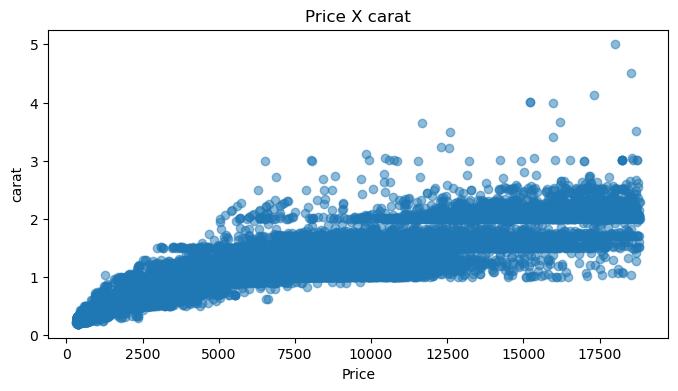

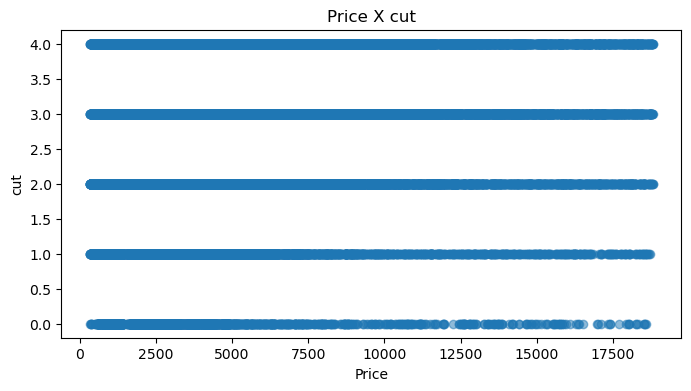

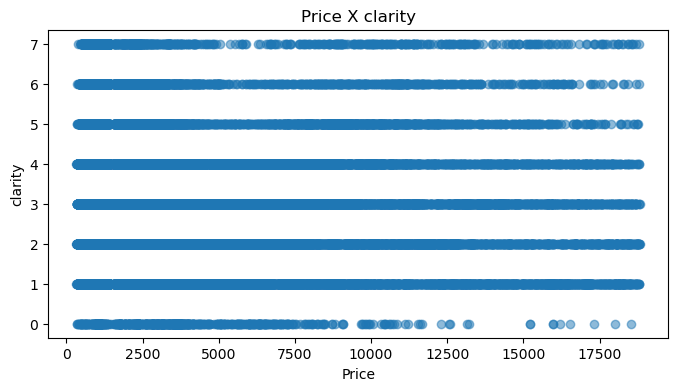

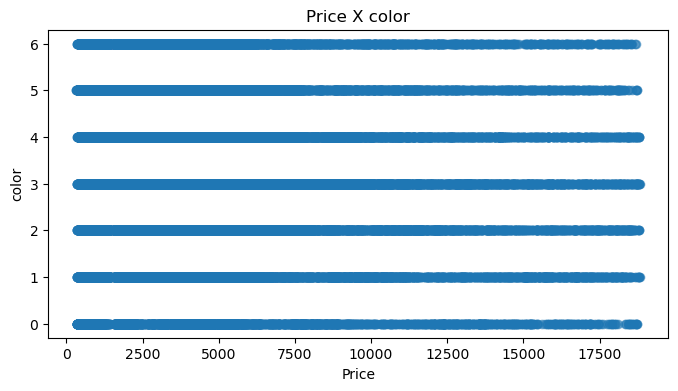

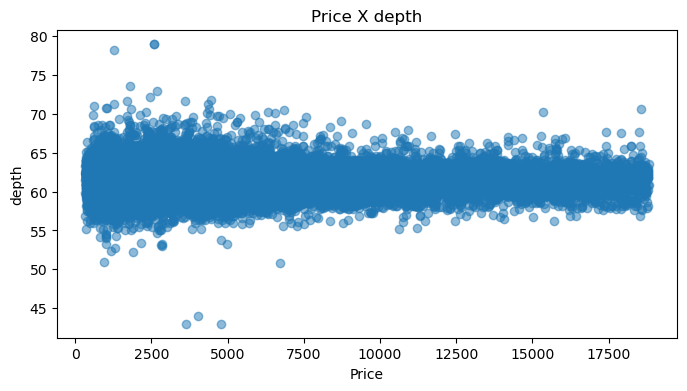

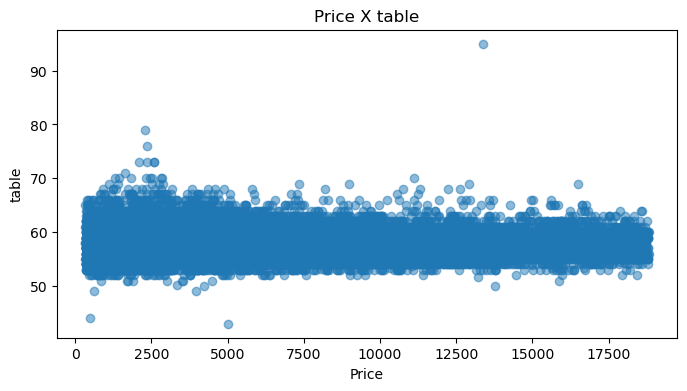

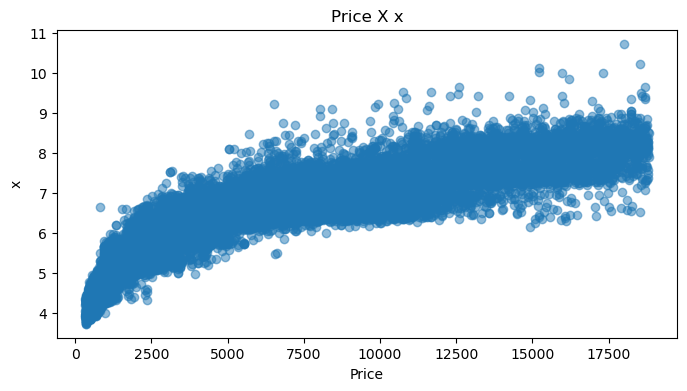

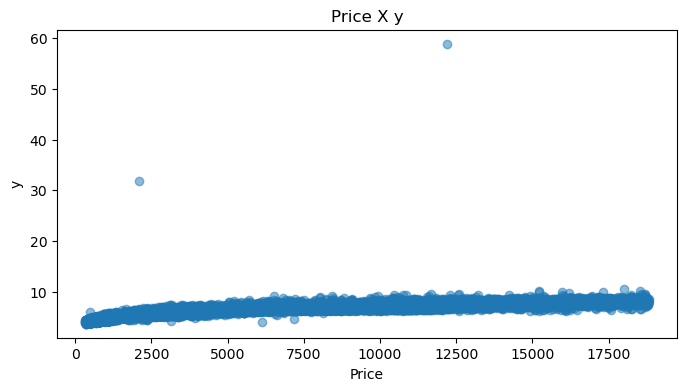

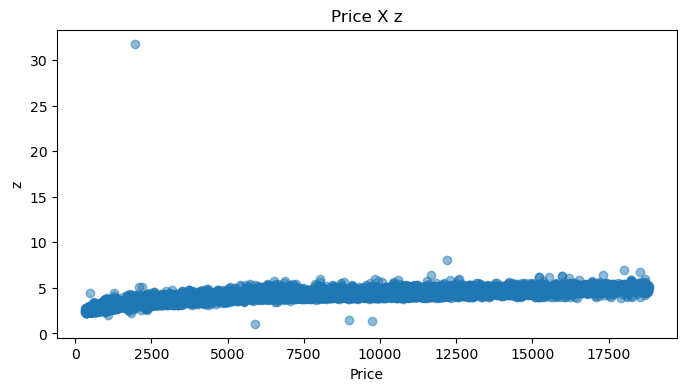

In [17]:
num_cols = ['carat', 'cut', 'clarity', 'color', 'depth', 'table', 'x', 'y', 'z']
for col in num_cols:
  plt.figure(figsize=(8,4))
  plt.scatter(df['price'], df[col], alpha=0.5)
  plt.xlabel('Price')
  plt.ylabel(col)
  plt.title(f'Price X {col}')
  plt.show()

In [18]:
df = df[(df['depth']<75) & (df['depth']>45)]
df = df[(df['table']<85) & (df['table']>40)]
df = df[(df['y']<30)]
df = df[(df['z']<30)]
df = df.reset_index(drop=True)
df.shape

(53910, 10)

In [19]:
corr_m = df.corr()
corr_m['price'].sort_values(ascending=False)

price      1.000000
carat      0.921595
y          0.888814
x          0.887220
z          0.882166
table      0.127044
depth     -0.010312
cut       -0.053477
clarity   -0.146751
color     -0.172399
Name: price, dtype: float64

O coeficiente de correlacao está no intervalo de menos um a um (inclusos). Quando o coeficiente está proximo de -1, temos uma correlacao negativa, quando proximo de 1 uma corrrelacao positiva, e valores proximos de zero indicam a ausencia de uma correlacao linear.

In [20]:
carat_buckets = [0,0.5,1.0,2.0,3.0,float('inf')]
df['carat_cat']=pd.cut(df['carat'], bins=carat_buckets)
print(df['carat_cat'].value_counts())

df['carat_cat_enc'] = pd.Categorical(df['carat_cat']).codes
df=df.drop(columns=['carat_cat'])
df.head(100)

carat_cat
(0.0, 0.5]    18930
(0.5, 1.0]    17498
(1.0, 2.0]    15600
(2.0, 3.0]     1850
(3.0, inf]       32
Name: count, dtype: int64


,carat,cut,color,clarity,depth,table,price,x,y,z,carat_cat_enc
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.70,1,5,3,57.5,58.0,2759,5.85,5.90,3.38,1
96,0.70,1,4,4,59.4,62.0,2759,5.71,5.76,3.40,1
97,0.96,0,4,1,66.3,62.0,2759,6.27,5.95,4.07,1
98,0.73,2,5,2,61.6,59.0,2760,5.77,5.78,3.56,1


In [21]:
scaler=MinMaxScaler()
normalize_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
df[normalize_cols] = scaler.fit_transform(df[normalize_cols])

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["carat_cat_enc"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['carat_cat_enc'], random_state=42)

In [24]:
print("Training set strata distribution:")
print(X_train['carat_cat_enc'].value_counts().sort_index())
print("\nTest set strata distribution:")
print(X_test['carat_cat_enc'].value_counts().sort_index())

Training set strata distribution:
carat_cat_enc
0    15144
1    13998
2    12480
3     1480
4       26
Name: count, dtype: int64

Test set strata distribution:
carat_cat_enc
0    3786
1    3500
2    3120
3     370
4       6
Name: count, dtype: int64


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43128 entries, 28945 to 42425
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43128 non-null  float64
 1   cut      43128 non-null  int64  
 2   color    43128 non-null  int64  
 3   clarity  43128 non-null  int64  
 4   depth    43128 non-null  float64
 5   table    43128 non-null  float64
 6   x        43128 non-null  float64
 7   y        43128 non-null  float64
 8   z        43128 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.3 MB


## Treinando modelos

In [26]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [28]:
X_train = X_train.drop(['carat_cat_enc'], axis=1)
X_train

,carat,cut,color,clarity,depth,table,x,y,z
28945,0.022869,3,1,3,0.504386,0.472222,0.082739,0.093294,0.274112
37771,0.037422,4,5,4,0.473684,0.361111,0.126961,0.142857,0.302876
33850,0.020790,4,5,3,0.491228,0.361111,0.087019,0.090379,0.272420
51055,0.106029,2,3,2,0.478070,0.361111,0.281027,0.300292,0.416244
3411,0.039501,4,0,2,0.447368,0.361111,0.139800,0.153061,0.306261
...,...,...,...,...,...,...,...,...,...
49867,0.083160,2,5,4,0.543860,0.361111,0.236805,0.236152,0.390863
14040,0.022869,3,3,3,0.350877,0.527778,0.097004,0.104956,0.257191
12350,0.012474,2,5,5,0.535088,0.416667,0.038516,0.051020,0.247039
49900,0.103950,4,2,3,0.464912,0.305556,0.291013,0.288630,0.412860


In [36]:
X_test = X_test.drop(['carat_cat_enc'], axis=1)
X_test

,carat,cut,color,clarity,depth,table,x,y,z
29955,0.031185,4,1,7,0.469298,0.333333,0.114123,0.129738,0.292724
13484,0.185031,2,5,2,0.513158,0.388889,0.402282,0.427114,0.514382
48548,0.081081,2,5,4,0.473684,0.500000,0.229672,0.246356,0.377327
34110,0.024948,4,4,6,0.421053,0.388889,0.097004,0.109329,0.270728
31604,0.020790,4,2,2,0.500000,0.388889,0.077033,0.087464,0.269036
...,...,...,...,...,...,...,...,...,...
13524,0.230769,3,0,2,0.377193,0.472222,0.483595,0.492711,0.531303
5529,0.145530,2,4,2,0.478070,0.472222,0.350927,0.370262,0.467005
4979,0.106029,4,3,7,0.442982,0.388889,0.286733,0.307580,0.412860
48477,0.076923,4,5,4,0.530702,0.388889,0.222539,0.231778,0.380711


In [31]:
y_train

28945     435
37771    1000
33850     844
51055    2334
3411      568
         ... 
49867    2177
14040     605
12350     597
49900    2184
42425    1315
Name: price, Length: 43128, dtype: int64

In [32]:
models = []
models.append(SVR())
models.append(DecisionTreeRegressor())
models.append(KNeighborsRegressor())
models.append(MLPRegressor(hidden_layer_sizes=(50,50,20)))
models.append(LinearRegression())
models.append(AdaBoostRegressor())
models_dict = {0: 'SVR', 1: 'Decision Tree', 2: 'KNN', 3: 'MLP Regressor', 4: 'Linear Regression', 5: 'AdaBoost Regressor'}

In [33]:
for model in models:
    model.fit(X_train,y_train)

/Users/isabella/Documents/MACKENZIE/AI/Atv_12/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
rms_results = []
for i, model in enumerate(models):
    cv_result = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    rms_results.append(cv_result)
    print(f"{models_dict[i]}: RMSE = {cv_result.mean()}")

SVR: RMSE = -4056.5803120983205
Decision Tree: RMSE = -758.072671537996
KNN: RMSE = -822.1710062115526


/Users/isabella/Documents/MACKENZIE/AI/Atv_12/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/isabella/Documents/MACKENZIE/AI/Atv_12/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/isabella/Documents/MACKENZIE/AI/Atv_12/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/isabella/Documents/MACKENZIE/AI/Atv_12/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

MLP Regressor: RMSE = -605.3580849133672
Linear Regression: RMSE = -1214.757023804778
AdaBoost Regressor: RMSE = -1166.9018531360066


In [37]:
for i, model in enumerate(models):
    pred = model.predict(X_test)
    print(f"{models_dict[i]}: RMSE={np.sqrt(metrics.mean_squared_error(y_test, pred))}")

SVR: RMSE=4054.8343096298736
Decision Tree: RMSE=718.038259029532
KNN: RMSE=764.1787805119154
MLP Regressor: RMSE=591.6896399429002
Linear Regression: RMSE=1198.0953608708878
AdaBoost Regressor: RMSE=1174.0901492003159


In [38]:
from sklearn.model_selection import GridSearchCV
params = {"hidden_layer_sizes": [(50,50,20), (100,50,20), (100,50,50,20)],
          "activation": ['relu', 'tanh'],
          "solver": ['adam', 'sgd'],
          "learning_rate": ['constant', 'adaptive']}
grid = GridSearchCV(estimator=MLPRegressor(), param_grid=params, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train, y_train)

In [44]:
mlp = MLPRegressor(hidden_layer_sizes=(100,50,50,20), learning_rate='adaptive')
mlp.fit(X_train, y_train)
pred_mlp = mlp.predict(X_test)
print(f"Optimized MLP Regressor: RMSE={np.sqrt(metrics.mean_squared_error(y_test, pred_mlp))}")

Optimized MLP Regressor: RMSE=608.4010625772762


## Estudo comparativo

In [47]:
import xgboost as xgb
import catboost as cb
from sklearn.ensemble import RandomForestRegressor

In [48]:
comp = []
comp.append(MLPRegressor(hidden_layer_sizes=(50,50,20)))
comp.append(RandomForestRegressor())
comp.append(xgb.XGBRegressor())
comp.append(cb.CatBoostRegressor())
comp_dict = {0: 'MLP Regressor', 1: 'Random Forest', 2: 'XGB', 3: 'CatBoost'}

In [49]:
for model in comp:
    model.fit(X_train,y_train)

Learning rate set to 0.074212
0:	learn: 3718.1604481	total: 57.9ms	remaining: 57.9s
1:	learn: 3476.9452120	total: 59.3ms	remaining: 29.6s
2:	learn: 3255.0145057	total: 60.6ms	remaining: 20.2s
3:	learn: 3050.1150738	total: 62ms	remaining: 15.4s
4:	learn: 2859.3979693	total: 63.2ms	remaining: 12.6s
5:	learn: 2682.9927711	total: 64.6ms	remaining: 10.7s
6:	learn: 2522.0933890	total: 65.8ms	remaining: 9.33s
7:	learn: 2371.1878682	total: 67.1ms	remaining: 8.32s
8:	learn: 2230.4634645	total: 68.3ms	remaining: 7.52s
9:	learn: 2101.3955776	total: 69.6ms	remaining: 6.89s
10:	learn: 1984.2000539	total: 70.9ms	remaining: 6.37s
11:	learn: 1875.9847823	total: 72.4ms	remaining: 5.96s
12:	learn: 1773.4853093	total: 73.7ms	remaining: 5.59s
13:	learn: 1681.3099123	total: 75ms	remaining: 5.28s
14:	learn: 1597.3404576	total: 76.3ms	remaining: 5.01s
15:	learn: 1518.8815944	total: 77.6ms	remaining: 4.77s
16:	learn: 1446.0686321	total: 78.8ms	remaining: 4.56s
17:	learn: 1379.0863592	total: 80.2ms	remaining: 

In [51]:
rms_results = []
for i, model in enumerate(comp):
    cv_result = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    rms_results.append(cv_result)
    print(f"{comp_dict[i]}: RMSE = {cv_result.mean()}")

MLP Regressor: RMSE = -610.2438360791233
Random Forest: RMSE = -553.1178787692245
XGB: RMSE = -554.2122680664063
Learning rate set to 0.071641
0:	learn: 3737.3718515	total: 1.77ms	remaining: 1.77s
1:	learn: 3503.1647915	total: 2.95ms	remaining: 1.47s
2:	learn: 3287.3823381	total: 4.2ms	remaining: 1.4s
3:	learn: 3085.9074918	total: 5.29ms	remaining: 1.32s
4:	learn: 2905.1072838	total: 6.51ms	remaining: 1.29s
5:	learn: 2732.5532959	total: 7.76ms	remaining: 1.28s
6:	learn: 2577.0490910	total: 8.87ms	remaining: 1.26s
7:	learn: 2430.8926440	total: 10.2ms	remaining: 1.26s
8:	learn: 2292.7496409	total: 11.4ms	remaining: 1.26s
9:	learn: 2164.4323248	total: 13.3ms	remaining: 1.32s
10:	learn: 2048.9016959	total: 14.4ms	remaining: 1.3s
11:	learn: 1936.9464980	total: 15.6ms	remaining: 1.29s
12:	learn: 1834.5492370	total: 16.7ms	remaining: 1.27s
13:	learn: 1743.0164051	total: 17.8ms	remaining: 1.25s
14:	learn: 1661.3170276	total: 18.9ms	remaining: 1.24s
15:	learn: 1581.8378289	total: 20.2ms	remaini

In [52]:
for i, model in enumerate(comp):
    pred = model.predict(X_test)
    print(f"{comp_dict[i]}: RMSE={np.sqrt(metrics.mean_squared_error(y_test, pred))}")

MLP Regressor: RMSE=583.6493359054149
Random Forest: RMSE=529.8784621214227
XGB: RMSE=528.3425143786935
CatBoost: RMSE=509.5468443659314
